In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import urllib.request
import zipfile
%matplotlib inline

In [9]:
print("downloading file ...")
archive_name = "indic-struct-distrib-revenu-2015-SUPRA.zip"
urllib.request.urlretrieve(
    "https://www.insee.fr/fr/statistiques/fichier/3560118/indic-struct-distrib-revenu-2015-SUPRA.zip", 
    archive_name
)
print("fully ownloaded !")

downloading file ...
fully ownloaded !


In [12]:
subarchive_name = "indic-struct-distrib-revenu-2015-METROPOLE.zip"

def extract(path, member):
    print("extracting all from %s ..." % path)
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extract(member, "./")
    print("done extracting !")

    
extract(archive_name, subarchive_name)
extract(subarchive_name, "FILO_DISP_METROPOLE.xls")

extracting all from indic-struct-distrib-revenu-2015-SUPRA.zip ...
done extracting !


extracting all from indic-struct-distrib-revenu-2015-SUPRA.zip ...
done extracting !


In [6]:
df = pd.read_excel(
    "FILO_DISP_METROPOLE.xls", 
    sheet_name="ENSEMBLE",
    header=0,
    index_col=1,
    skiprows=[0,1,2,3,5]
)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'FILO_DISP_METROPOLE.xls'

In [168]:
df2 = df[[
    '1er décile (€)', '2e décile (€)', '1er quartile (€)', 
    '3e décile (€)', '4e décile (€)', 'Médiane (€)', 
    '6e décile (€)', '7e décile (€)', '3e quartile (€)', 
    '8e décile (€)', '9e décile (€)'
]].transpose()
print()
df2 = df2.assign(centile=[0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, .8, .9])
df2 = df2.assign(label=[
    '1er décile - 10%', '2e décile - 20%', '1er quartile - 25%', 
    '3e décile - 30%', '4e décile - 40%', 'Médiane - 50%', 
    '6e décile - 60%', '7e décile - 70%', '3e quartile - 80%', 
    '8e décile - 80%', '9e décile - 90%'
])
df3 = df2.set_index('centile')
df3

Libellé géographique,France métropolitaine,label
centile,,
0.10,10739.000000,1er décile - 10%
0.20,13743.000000,2e décile - 20%
0.25,14976.666667,1er quartile - 25%
0.30,16153.448276,3e décile - 30%
0.40,18391.000000,4e décile - 40%
0.50,20565.555556,Médiane - 50%
0.60,22917.500000,6e décile - 60%
0.70,25806.923077,7e décile - 70%
0.75,27670.000000,3e quartile - 80%


<Figure size 600x600 with 0 Axes>

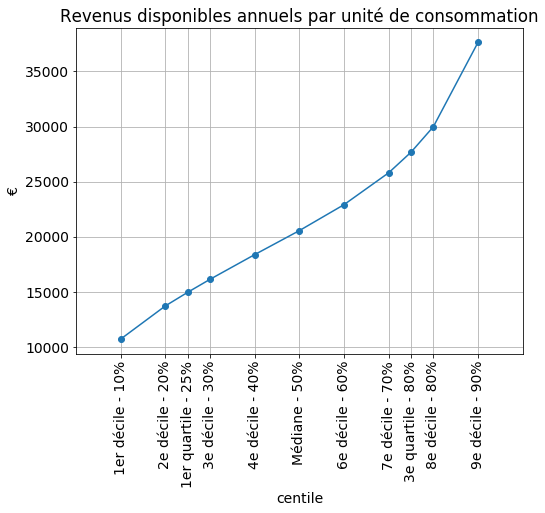

<Figure size 600x600 with 0 Axes>

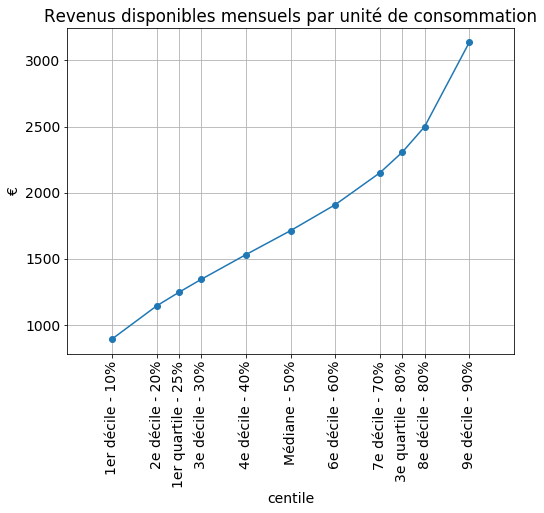

In [173]:
plt.rcParams['figure.figsize'] = [8, 6]
font = {'size': 14}
matplotlib.rc('font', **font)

def chart(df, ylabel):
    plt.figure(figsize=(1,1), dpi=600)
    ax = df.plot(kind="line", marker="o", grid=True, legend=False)
    ax.set_ylabel("€")
    ax.set_title(ylabel)
    ax.set_xticks(df.index.tolist())
    ax.set_xlim([0,1])
    ax.set_xticklabels(df.label, rotation=90)

    
chart(df3, "Revenus disponibles annuels par unité de consommation")
df4 = df3.copy()
df4['France métropolitaine'] = df4['France métropolitaine'] / 12
chart(df4, "Revenus disponibles mensuels par unité de consommation")